In [36]:
import matplotlib

matplotlib.use("Agg")
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import pandas as pd
import os,sys

from PIL import Image, ImageOps,ImageDraw
from time import time
from time import sleep
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split




from matplotlib.pyplot import imshow


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramData\A

In [33]:
def normalizeRed(intensity):
    iI      = intensity
    minI    = 86
    maxI    = 230
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

 

# Method to process the green band of the image
def normalizeGreen(intensity):
    iI      = intensity
    minI    = 90
    maxI    = 225
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Method to process the blue band of the image
def normalizeBlue(intensity):
    iI      = intensity
    minI    = 100
    maxI    = 210
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

In [34]:
def imageresize(cls,imagefile):
    inputpath = cls+'/'+imagefile
    targetsize = 128
    im = Image.open(inputpath)
    oldsize = im.size
    
    ratio = float(targetsize)/max(oldsize)
    
    newsize = tuple(int(x*ratio) for x in oldsize)
    im = im.resize(newsize,Image.ANTIALIAS)
    new_im = Image.new("RGB", (targetsize, targetsize), 'white')
    new_im.paste(im, ((targetsize-newsize[0])//2,
                    (targetsize-newsize[1])//2))
    multiBands = new_im.split()
    # Apply point operations that does contrast stretching on each color band
    normalizedRedBand      = multiBands[0].point(normalizeRed)
    normalizedGreenBand    = multiBands[1].point(normalizeGreen)
    normalizedBlueBand     = multiBands[2].point(normalizeBlue)
    
    outputimage = Image.merge('RGB',(normalizedRedBand, normalizedGreenBand, normalizedBlueBand))
    return outputimage

def process_image(image, blocks=4):
    '''Given a PIL Image object it returns its feature vector.

    Args:
      image (PIL.Image): image to process.
      blocks (int, optional): number of block to subdivide the RGB space into.

    Returns:
      list of float: feature vector if successful. None if the image is not
      RGB.
    '''
    if not image.mode == 'RGB':
        return None
    feature = [0] * blocks * blocks * blocks
    pixel_count = 0
    for pixel in image.getdata():
        ridx = int(pixel[0]/(256/blocks))
        gidx = int(pixel[1]/(256/blocks))
        bidx = int(pixel[2]/(256/blocks))
        idx = ridx + gidx * blocks + bidx * blocks * blocks
        feature[idx] += 1
        pixel_count += 1
    return [x/pixel_count for x in feature]

In [35]:
myrootdir = 'D:/MyWorx/Courses/PAF Bootcamp/Challenges/Images/gear_images'
outputdir = 'D:/MyWorx/Courses/PAF Bootcamp/Challenges/Images/output'
os.mkdir(outputdir)
os.chdir(myrootdir)

classes = [d for d in os.listdir('.') if os.path.isdir(d)]

for cls in classes:
    os.mkdir(outputdir+'/'+cls)
    imageslist = [f for f in os.listdir(cls) if os.path.isfile(os.path.join(cls,f))]
    for imagefile in imageslist:
        normalizedimage = imageresize(cls,imagefile)
        normalizedimage.save(outputdir+'/'+cls+'/'+imagefile)
    print("Working with {0} class with {1} images".format(cls,len(imageslist)))


[0.049560546875, 0.00177001953125, 0.0, 0.0, 0.0, 0.00213623046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01202392578125, 0.00054931640625, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.00018310546875, 0.0091552734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020751953125, 0.0, 0.0, 0.0, 0.00054931640625, 0.9208984375]
[0.0538330078125, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.014404296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00140380859375, 0.0, 0.0, 0.0, 0.0008544921875, 0.00634765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030517578125, 0.0, 0.0, 0.0, 0.0006103515625, 0.91827392578125]
[0.00445556640625, 0.000244140625, 0.0, 0.0, 0.0001831054687

[0.007568359375, 0.000732421875, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00128173828125, 0.0008544921875, 0.0, 0.0, 0.0, 0.00079345703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00732421875, 0.0, 0.0, 0.0, 0.00469970703125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00018310546875, 0.00360107421875, 0.00079345703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.01153564453125, 6.103515625e-05, 0.0, 0.0, 0.013916015625, 0.001708984375, 0.0008544921875, 0.0001220703125, 0.00140380859375, 0.001708984375, 0.00445556640625, 0.93408203125]
[0.03253173828125, 0.00079345703125, 0.0, 0.0, 0.0, 0.00146484375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.00347900390625, 0.00030517578125, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.0001220703125, 0.00830078125, 6.103515625e-05, 0.0, 0.0, 0.0

[0.02276611328125, 0.0015869140625, 6.103515625e-05, 0.0, 0.0001220703125, 0.00408935546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00616455078125, 0.000244140625, 0.0, 0.0, 6.103515625e-05, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0001220703125, 0.01580810546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00537109375, 0.0, 0.0, 0.0, 0.002197265625, 0.94073486328125]
[0.02264404296875, 0.00042724609375, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00408935546875, 0.00048828125, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00616455078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00103759765625, 6.103515625e-05, 0.0, 0.0, 0.00042724609375, 0.9635009765625]
[0.013549

[0.00909423828125, 0.00048828125, 0.0, 0.0, 0.0, 0.0008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002197265625, 0.0, 0.0, 0.0, 0.0006103515625, 0.001708984375, 0.0003662109375, 0.0, 0.0, 6.103515625e-05, 0.0008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00469970703125, 0.0, 0.0, 0.0, 0.0054931640625, 0.0003662109375, 6.103515625e-05, 0.0, 0.0, 0.00067138671875, 0.00311279296875, 0.000244140625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.00616455078125, 0.0, 0.0, 0.0, 0.00927734375, 0.002197265625, 0.00140380859375, 0.0, 0.0029296875, 0.00836181640625, 0.0032958984375, 0.9354248046875]
[0.058349609375, 0.00323486328125, 0.0, 0.0, 0.0, 0.00494384765625, 0.000244140625, 0.0, 0.0, 0.0, 0.00091552734375, 0.0001220703125, 0.0, 0.0, 6.103515625e-05, 0.01800537109375, 0.00067138671875, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0064697265625, 0.0001220703125, 0.0, 0.0, 0.00018310546875, 0.0009765625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00341796875, 0.0009765625, 0.0, 

[0.04443359375, 0.00384521484375, 0.00079345703125, 0.0, 0.0, 0.004150390625, 0.00128173828125, 0.000732421875, 0.0, 0.0, 0.00030517578125, 0.0172119140625, 0.0, 0.0, 0.0, 0.01141357421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00543212890625, 0.00146484375, 6.103515625e-05, 0.0, 0.0, 0.001953125, 0.00030517578125, 0.0, 0.0, 0.0, 0.00360107421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0067138671875, 0.00018310546875, 0.0, 0.0, 0.0, 0.00335693359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 0.0, 0.0, 0.0, 0.00030517578125, 0.8914794921875]
[0.01641845703125, 0.01641845703125, 0.01312255859375, 0.0091552734375, 0.0001220703125, 0.0009765625, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.000732421875, 0.0, 0.00225830078125, 0.00128173828125, 0.0025634765625, 0.0, 0.0, 0.00048828125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.0009765625, 0.0, 0.00030

[0.2867431640625, 0.01995849609375, 0.009521484375, 0.018798828125, 0.0013427734375, 0.01104736328125, 0.0106201171875, 0.00189208984375, 0.0, 0.000244140625, 0.006591796875, 0.013671875, 0.0, 0.0, 0.0001220703125, 0.11981201171875, 0.0003662109375, 0.0001220703125, 6.103515625e-05, 6.103515625e-05, 0.0009765625, 0.00872802734375, 0.0006103515625, 0.00152587890625, 0.0, 0.0003662109375, 0.00091552734375, 0.00067138671875, 0.0, 0.0, 0.0001220703125, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013427734375, 0.00018310546875, 0.0001220703125, 0.0, 0.00189208984375, 0.0052490234375, 0.00091552734375, 0.0, 0.0, 0.0001220703125, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.001220703125, 0.00054931640625, 0.0, 0.0, 0.0013427734375, 0.47161865234375]
[0.28472900390625, 0.01214599609375, 0.00830078125, 0.03240966796875, 0.0023193359375, 0.00421142578125, 0.00152587890625, 0.00146484375, 0.00048828125, 0.0006103515625, 0.00140380859375, 0.0025634765625, 0.0

[0.3173828125, 0.0247802734375, 0.01898193359375, 0.0224609375, 0.0015869140625, 0.00811767578125, 0.006591796875, 0.00994873046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00018310546875, 0.00665283203125, 0.00360107421875, 0.0050048828125, 0.0, 0.0003662109375, 0.0010986328125, 0.0029296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.00042724609375, 0.00390625, 0.00164794921875, 0.0, 0.0, 0.0001220703125, 0.00103759765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00115966796875, 0.0, 0.0, 0.0, 0.0003662109375, 0.56146240234375]
[0.30718994140625, 0.00103759765625, 0.0, 0.0, 0.005615234375, 0.02642822265625, 0.00048828125, 0.0, 0.0, 0.0023193359375, 0.01849365234375, 0.00030517578125, 0.0, 0.0, 0.0025634765625, 0.01220703125, 0.00677490234375, 0.0, 0.0, 0.0, 0.0050048828125, 0.031005859375, 0.00018310546875, 0.0, 0.0, 0.00372314453125, 0.00531005859375, 0.0, 0.0, 0.0, 0.0003662109375, 0.00445556640625, 6.

[0.24603271484375, 0.00250244140625, 0.00030517578125, 0.00048828125, 0.00244140625, 0.00408935546875, 0.0, 0.000244140625, 0.0, 0.00018310546875, 0.0006103515625, 0.0, 0.0, 0.0, 0.00140380859375, 0.00146484375, 0.0003662109375, 0.0, 0.0, 0.0, 0.01690673828125, 0.00726318359375, 0.000244140625, 6.103515625e-05, 0.000732421875, 0.000244140625, 0.00018310546875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00433349609375, 0.00079345703125, 0.0001220703125, 0.0, 0.02899169921875, 0.00286865234375, 0.0062255859375, 0.000244140625, 0.0, 0.0, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0115966796875, 0.0028076171875, 0.001708984375, 6.103515625e-05, 0.00146484375, 0.00750732421875, 0.00286865234375, 0.64239501953125]
[0.251953125, 0.01263427734375, 0.0093994140625, 0.03887939453125, 0.0003662109375, 0.0062255859375, 0.0025634765625, 0.03143310546875, 0.0, 0.00048828125, 0.00079345703125, 0.003173828125, 0.0, 0.0, 0.0020751953125, 0.001953125, 6.1

[0.38055419921875, 0.0018310546875, 0.0003662109375, 0.0020751953125, 0.0020751953125, 0.0115966796875, 0.00030517578125, 0.00018310546875, 0.0, 0.0, 0.00042724609375, 0.0006103515625, 0.0, 0.0, 0.0, 0.00140380859375, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.04541015625, 0.0001220703125, 0.0, 0.0, 0.00201416015625, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.0, 0.0, 0.0, 0.0052490234375, 0.029296875, 0.0, 0.0, 0.0, 0.00018310546875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012451171875, 0.0, 0.0, 0.0, 0.003662109375, 0.49798583984375]
[0.4864501953125, 0.00872802734375, 0.008056640625, 0.0023193359375, 0.0001220703125, 0.00201416015625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00250244140625, 0.00592041015625, 0.0, 0.0047607421875, 0.00115966796875, 0.00048828125, 0.0, 0.00030517578125, 0.00103759765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.00018310546875, 0.

[0.47467041015625, 0.044921875, 0.0018310546875, 0.0, 0.00103759765625, 0.00494384765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00164794921875, 0.00238037109375, 0.0003662109375, 0.0, 0.03167724609375, 0.00262451171875, 0.0, 0.0, 0.0003662109375, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.00067138671875, 0.001953125, 0.00018310546875, 0.0, 0.00146484375, 0.0145263671875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0035400390625, 0.000732421875, 0.0, 0.0, 0.00177001953125, 0.408447265625]
[0.28521728515625, 0.014892578125, 0.01617431640625, 0.0150146484375, 0.00189208984375, 0.01190185546875, 0.00360107421875, 0.00347900390625, 0.0, 0.00030517578125, 0.0064697265625, 0.0052490234375, 0.0, 0.0, 0.000244140625, 0.02264404296875, 0.0, 0.0, 0.0, 0.00018310546875, 0.0001220703125, 0.00836181640625, 0.0008544921875, 0.0009765625, 0.0, 0.00067138671875, 0.0013427734375, 0.0006103515625, 0.0, 0

[0.3460693359375, 0.0069580078125, 0.0003662109375, 0.004150390625, 0.000244140625, 0.004150390625, 0.00091552734375, 0.0006103515625, 0.0, 0.0, 0.0001220703125, 0.00079345703125, 0.0, 0.0, 0.0, 0.00146484375, 0.00958251953125, 0.00079345703125, 0.0, 0.0, 0.0029296875, 0.0399169921875, 0.00164794921875, 0.0001220703125, 0.0, 0.00018310546875, 0.0010986328125, 0.00030517578125, 0.0, 0.0, 6.103515625e-05, 0.00067138671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01458740234375, 0.00030517578125, 0.0, 0.0, 0.007568359375, 0.03521728515625, 0.00030517578125, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.018798828125, 0.00030517578125, 0.0, 0.0, 0.01800537109375, 0.4814453125]
[0.33673095703125, 0.05743408203125, 0.112060546875, 0.013671875, 0.000732421875, 0.00054931640625, 0.0001220703125, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00299072265625, 0.0023193359375, 6.103515625e-05, 0.0, 0.001953125, 0.011962890625, 0.0009765625, 0.000732421875, 0.

[0.10357666015625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011474609375, 0.0001220703125, 0.0, 0.0, 0.0047607421875, 0.0032958984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013427734375, 0.0, 0.0, 0.0, 0.00634765625, 0.0020751953125, 0.0, 0.0, 0.0003662109375, 0.00262451171875, 0.00128173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00225830078125, 0.0, 0.0, 0.0, 0.00274658203125, 0.00347900390625, 0.00360107421875, 0.000244140625, 0.00030517578125, 0.0029296875, 0.01031494140625, 0.8367919921875]
[0.11688232421875, 0.0001220703125, 0.0, 0.0, 0.000244140625, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01727294921875, 0.000244140625, 0.0, 0.0, 0.00469970703125, 0.00616455078125, 0.0001220703125, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013427734375, 0.0, 0.0, 0.0, 0.0089111328125, 0.00311279296875, 0.00030517578125, 0.0, 0.00042724609375, 0.00140380859375, 0.0046

[0.04815673828125, 0.0003662109375, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.035888671875, 0.0, 0.0, 0.0, 0.01605224609375, 0.0096435546875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00811767578125, 0.0345458984375, 0.000244140625, 0.0, 0.0, 0.01373291015625, 0.0126953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00640869140625, 0.03082275390625, 0.0001220703125, 0.0, 0.0, 0.00994873046875, 0.7725830078125]
[0.07666015625, 0.0003662109375, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0352783203125, 0.0, 0.0, 0.0, 0.01824951171875, 0.01116943359375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00634765625, 0.03094482421875, 0.00030517578125, 0.0, 0.0, 0.00970458984375, 0.01263427734375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00555419921875, 0.02178955

[0.14556884765625, 0.00018310546875, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0185546875, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.00457763671875, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015869140625, 0.0, 0.0, 0.0, 0.00030517578125, 0.00244140625, 0.0001220703125, 0.0, 0.0, 0.00030517578125, 0.0032958984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0157470703125, 0.0, 0.0, 0.0, 0.00616455078125, 0.00360107421875, 0.0, 0.0, 0.0, 0.001953125, 0.0042724609375, 6.103515625e-05, 0.0, 0.0, 0.0013427734375, 0.7750244140625]
[0.1851806640625, 6.103515625e-05, 0.0, 0.0, 0.00042724609375, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0009765625, 0.00543212890625, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 0.0, 0.0, 0.0, 0.00189208984375, 0.0040283203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

[0.089599609375, 6.103515625e-05, 0.0, 0.0, 0.0146484375, 0.00103759765625, 0.0, 0.0, 0.00640869140625, 0.00537109375, 0.000244140625, 0.0, 0.00042724609375, 0.00146484375, 0.00067138671875, 0.0, 0.02545166015625, 0.0, 0.0, 0.0, 0.00408935546875, 0.00164794921875, 6.103515625e-05, 0.0, 0.0, 0.00067138671875, 0.00115966796875, 0.0, 0.0, 0.0, 0.0020751953125, 0.0, 0.01708984375, 0.0, 0.0, 0.0, 0.02001953125, 0.0025634765625, 0.0, 0.0, 6.103515625e-05, 0.00201416015625, 0.001708984375, 6.103515625e-05, 0.0, 0.0, 0.0009765625, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 0.0126953125, 0.0, 0.0, 0.0, 0.0076904296875, 0.00927734375, 0.00738525390625, 0.0, 0.0, 0.0015869140625, 0.0135498046875, 0.74725341796875]
[0.010986328125, 0.001953125, 0.00213623046875, 0.0386962890625, 6.103515625e-05, 0.002197265625, 0.00128173828125, 0.14227294921875, 0.0, 0.0, 6.103515625e-05, 0.038818359375, 0.0, 0.0, 0.0, 0.01483154296875, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00323486328125, 0.00146484375, 0.0, 0.0, 0.0001

[0.050537109375, 0.0003662109375, 0.0, 0.0, 0.00018310546875, 0.00140380859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0582275390625, 6.103515625e-05, 0.0, 0.0, 0.00201416015625, 0.00286865234375, 0.000244140625, 0.0, 0.0, 6.103515625e-05, 0.00091552734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0390625, 0.0, 0.0, 0.0, 0.00830078125, 0.00079345703125, 0.0, 0.0, 6.103515625e-05, 0.000732421875, 0.00341796875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.00518798828125, 0.0, 0.0, 0.0, 0.07830810546875, 0.0, 0.0, 0.0, 0.002197265625, 0.00335693359375, 0.00164794921875, 0.0, 0.0, 0.0, 0.00335693359375, 0.73663330078125]
[0.23773193359375, 0.0008544921875, 0.0, 0.0, 0.0, 0.00421142578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00726318359375, 0.00018310546875, 0.0, 0.0, 6.103515625e-05, 0.00152587890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.00738525390625, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.

[0.09991455078125, 0.00201416015625, 0.0, 0.0, 0.0, 0.00189208984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08331298828125, 0.001220703125, 0.0, 0.0, 0.0, 0.00128173828125, 0.00030517578125, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03790283203125, 0.00946044921875, 0.0, 0.0, 0.0, 0.0042724609375, 0.00091552734375, 0.0, 0.0, 0.0, 0.00128173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.00286865234375, 0.0, 0.0, 0.0, 0.00250244140625, 0.00286865234375, 0.0, 0.0, 0.0, 0.0072021484375, 0.00299072265625, 0.0, 0.0, 6.103515625e-05, 0.7374267578125]
[0.19873046875, 0.00091552734375, 0.0, 0.0, 0.002685546875, 0.01763916015625, 0.0, 0.0, 0.0, 0.007080078125, 0.003662109375, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.009033203125, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.00164794921875, 0.0, 0.0, 0.0, 0.00128173828125, 0.002197265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00457763671

[0.12939453125, 0.00054931640625, 0.0, 0.0, 0.00079345703125, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0074462890625, 0.0, 0.0, 0.0, 0.02288818359375, 0.001708984375, 0.00042724609375, 0.0, 0.0001220703125, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01629638671875, 0.0001220703125, 0.0, 0.0, 0.02191162109375, 0.00146484375, 0.00213623046875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0218505859375, 0.00140380859375, 0.00054931640625, 0.000244140625, 0.00439453125, 0.001953125, 0.00592041015625, 0.7576904296875]
[0.14056396484375, 0.0008544921875, 0.0, 0.0, 0.0003662109375, 0.003173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00244140625, 0.0, 0.0, 0.0, 0.00714111328125, 0.02618408203125, 6.103515625e-05, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00445556640625, 0.0025634765625, 6.103515625e-05, 0.0, 0.00518798828125, 0.001953125, 0.0237

[0.01922607421875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02947998046875, 0.0, 0.0, 0.0, 0.00567626953125, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01361083984375, 0.0, 0.0, 0.0, 0.0859375, 0.000732421875, 0.0, 0.0, 0.00067138671875, 0.00225830078125, 0.0003662109375, 0.0010986328125, 0.0, 0.0, 0.0, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.039794921875, 0.0, 0.0, 0.0, 0.00823974609375, 0.0047607421875, 0.0028076171875, 0.00018310546875, 0.0, 0.0, 0.00360107421875, 0.78070068359375]
[0.00439453125, 0.0140380859375, 0.0111083984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03485107421875, 0.029296875, 0.0, 0.0, 0.00091552734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.09307861328125, 0.0, 0.0, 0.0018310546875, 0.012451171875, 0.0, 0.0, 0.000244140625, 0.00103759765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.00299

[0.00103759765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00177001953125, 0.0, 0.0, 0.0, 0.00115966796875, 0.00140380859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00677490234375, 0.0, 0.0, 0.0, 0.001708984375, 0.00115966796875, 0.0, 0.0, 0.0, 0.00177001953125, 0.00128173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0147705078125, 0.0, 0.0, 0.0, 0.10516357421875, 0.0, 0.0, 0.0, 0.0911865234375, 0.00201416015625, 0.00347900390625, 0.0, 0.00299072265625, 0.00616455078125, 0.010009765625, 0.74615478515625]
[0.14031982421875, 0.0, 0.0, 0.0, 0.0010986328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00360107421875, 0.0, 0.0, 0.0, 0.0101318359375, 0.048583984375, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01300048828125, 0.0, 0.0, 0.0, 0.00726318359375, 0.01251220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0068359375, 0.0, 0.0, 0.0, 0.0042724609375, 0

[0.005126953125, 0.02008056640625, 0.041259765625, 0.07843017578125, 0.0, 0.0001220703125, 0.000732421875, 0.09320068359375, 0.0, 0.0, 6.103515625e-05, 0.02471923828125, 0.0, 0.0, 0.0, 0.0013427734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 0.00128173828125, 0.0010986328125, 0.0, 6.103515625e-05, 0.000244140625, 0.00201416015625, 0.0, 0.0, 0.0, 0.00213623046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00238037109375, 0.0018310546875, 0.0, 0.0, 0.0, 0.00372314453125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.00048828125, 0.0, 0.0, 6.103515625e-05, 0.71893310546875]
[0.001220703125, 0.00811767578125, 0.05267333984375, 0.01007080078125, 0.0, 0.0001220703125, 0.0093994140625, 0.08209228515625, 0.0, 0.0, 6.103515625e-05, 0.0172119140625, 0.0, 0.0, 0.0, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0006103515625, 0.000244140625, 0.0, 0.0, 0.000732421875, 0.0028076171875, 0.0, 0.0, 0.0, 0.0020751953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

[0.03045654296875, 0.000732421875, 0.0, 0.0, 0.0, 0.0025634765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0042724609375, 0.00067138671875, 0.0, 0.0, 0.00238037109375, 0.0360107421875, 0.00091552734375, 0.0, 0.0, 0.0001220703125, 0.00152587890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.01434326171875, 0.000244140625, 0.0, 0.0, 0.0054931640625, 0.035400390625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.028564453125, 0.0001220703125, 0.0, 0.0, 0.0052490234375, 0.83056640625]
[0.2298583984375, 0.00225830078125, 0.0, 0.0, 0.0, 0.0052490234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01202392578125, 0.00048828125, 0.0, 0.0, 0.0, 0.00128173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0057373046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001220703125, 0.0, 0.0, 0

[0.1138916015625, 0.00079345703125, 0.0, 0.0, 0.0001220703125, 0.00177001953125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01995849609375, 0.0003662109375, 0.0, 0.0, 0.0028076171875, 0.0535888671875, 0.00030517578125, 0.0, 0.0, 6.103515625e-05, 0.00079345703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01177978515625, 0.0, 0.0, 0.0, 0.00048828125, 0.008544921875, 6.103515625e-05, 0.0, 0.0, 0.0042724609375, 0.01220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023193359375, 0.0, 0.0, 0.0, 0.0029296875, 0.0001220703125, 0.0, 0.0, 0.001953125, 0.00347900390625, 0.007568359375, 0.0, 0.0, 0.00067138671875, 0.00555419921875, 0.7435302734375]
[0.087646484375, 0.00079345703125, 0.0, 0.0, 0.00653076171875, 0.00640869140625, 0.0, 0.0, 0.001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.00048828125, 0.0, 0.0, 0.00140380859375, 0.07830810546875, 0.0001220703125, 0.0, 0.0, 0.0020751953125, 0.0008544921875, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0.142333984375, 0.00030517578125, 0.0, 0.0, 0.00030517578125, 0.00079345703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0125732421875, 0.0003662109375, 0.0, 0.0, 0.00439453125, 0.02337646484375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0040283203125, 0.0001220703125, 0.0, 0.0, 0.0, 0.01385498046875, 0.0001220703125, 0.0, 0.0, 0.0062255859375, 0.0108642578125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00408935546875, 0.00408935546875, 0.00048828125, 0.0, 0.0, 0.0003662109375, 0.0020751953125, 0.0, 0.0, 0.00018310546875, 0.01373291015625, 0.00030517578125, 0.0, 0.0, 0.00579833984375, 0.7491455078125]
[0.06182861328125, 0.00592041015625, 0.0, 0.0, 0.0001220703125, 0.00146484375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00054931640625, 0.001953125, 0.0, 0.0, 0.000244140625, 0.0369873046875, 0.00634765625, 0.0, 0.0, 6.103515625e-05, 0.00067138671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00384521484375, 0.002685546875, 0.0, 0.0, 0.0006103515625,

[0.05438232421875, 0.02227783203125, 0.0, 0.0, 0.0, 0.0262451171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0609130859375, 0.0008544921875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 0.00115966796875, 0.0, 0.0, 0.00018310546875, 0.0220947265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007568359375, 0.0006103515625, 0.0, 0.0, 0.00103759765625, 0.80218505859375]
[0.1181640625, 0.0006103515625, 0.0, 0.0, 0.00018310546875, 0.0020751953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01873779296875, 0.0006103515625, 0.0, 0.0, 0.00213623046875, 0.0469970703125, 0.0003662109375, 0.0, 0.0, 6.103515625e-05, 0.0008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01275634765625, 0.0, 0.0, 0.0, 0.00048828125, 0.00927734375, 0.0001220703125, 0.0, 0.0, 0.00286865234375, 0.01080322265625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.0028076171875, 0.0, 

[0.21124267578125, 0.0045166015625, 0.002197265625, 0.00201416015625, 0.0001220703125, 0.001708984375, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.0079345703125, 0.00042724609375, 0.00018310546875, 0.0, 6.103515625e-05, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.00018310546875, 0.0, 0.0, 0.00018310546875, 0.00531005859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00213623046875, 0.0, 0.0, 0.0, 0.00042724609375, 0.76043701171875]
[0.1090087890625, 0.01123046875, 0.0040283203125, 0.0020751953125, 0.000244140625, 0.00042724609375, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021484375, 0.00018310546875, 0.0, 0.000244140625, 0.01373291015625, 0.0181884765625, 0.0006103515625, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00054931640625, 0.0201416015625, 6.103515625e-05, 6.103515625e-05, 0.

[0.08294677734375, 0.0, 0.0, 0.0, 0.00836181640625, 0.00689697265625, 0.0, 0.0, 0.0, 0.00738525390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00030517578125, 0.00543212890625, 0.0, 0.0, 0.0, 0.008544921875, 0.011474609375, 0.0, 0.0, 0.0, 0.00518798828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 6.103515625e-05, 0.0, 0.0, 0.0006103515625, 0.00689697265625, 0.0, 0.0, 0.0, 0.030517578125, 0.0052490234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00213623046875, 0.0, 0.0, 0.0, 0.00213623046875, 0.81536865234375]
[0.09075927734375, 0.001708984375, 0.0001220703125, 0.000244140625, 6.103515625e-05, 0.00335693359375, 0.000244140625, 0.00048828125, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0196533203125, 0.000244140625, 0.0, 0.0, 0.0001220703125, 0.00030517578125, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 6.103515625e-05, 0.0, 0.0, 0.00048828125, 0.0196533203125, 6

[0.11700439453125, 0.01141357421875, 0.00469970703125, 0.00048828125, 0.0001220703125, 0.0029296875, 0.01123046875, 0.00238037109375, 0.0, 0.0, 0.00537109375, 0.02099609375, 0.0, 0.0, 6.103515625e-05, 0.01776123046875, 0.00018310546875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00457763671875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00042724609375, 0.00042724609375, 0.0, 0.0, 0.0, 0.0028076171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.0003662109375, 0.003173828125, 0.0003662109375, 0.0, 0.0, 0.0, 0.00286865234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765625, 0.0, 0.0, 0.0, 0.00067138671875, 0.7880859375]
[0.0218505859375, 0.0010986328125, 0.00018310546875, 0.00054931640625, 0.00018310546875, 0.0020751953125, 0.00103759765625, 0.0010986328125, 0.0, 0.0, 0.00152587890625, 0.0023193359375, 0.0, 0.0, 6.103515625e-05, 0.0428466796875, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0, 0.005126953125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00048828125, 0.000244140625, 0.0, 0

[0.095947265625, 0.00921630859375, 0.017333984375, 0.00823974609375, 0.000244140625, 0.00286865234375, 0.0032958984375, 0.0020751953125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00030517578125, 0.01702880859375, 0.00244140625, 6.103515625e-05, 0.0, 0.0001220703125, 0.00079345703125, 0.00152587890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00286865234375, 0.00018310546875, 0.0, 0.0, 0.00469970703125, 0.0206298828125, 0.001220703125, 0.0, 0.0, 6.103515625e-05, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00885009765625, 0.0003662109375, 0.0, 0.0, 0.0068359375, 0.79217529296875]
[0.090576171875, 0.01287841796875, 0.01318359375, 0.00384521484375, 0.00018310546875, 0.00286865234375, 0.0029296875, 0.00128173828125, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.00048828125, 0.01861572265625, 0.0013427734375, 0.00018310546875, 0.0, 0.000244140625, 0.00091552734375

[0.10888671875, 0.004150390625, 0.0, 0.0, 0.00042724609375, 0.00335693359375, 0.0, 0.0, 6.103515625e-05, 0.00042724609375, 0.000732421875, 0.0, 0.0, 0.0, 0.00042724609375, 0.00042724609375, 0.000244140625, 0.00054931640625, 0.0, 0.0, 0.0, 0.01641845703125, 0.0035400390625, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.0001220703125, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010986328125, 0.00311279296875, 0.0, 0.0, 0.0, 0.02386474609375, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00665283203125, 0.0030517578125, 0.0, 0.0, 0.000244140625, 0.82098388671875]
[0.13250732421875, 0.01031494140625, 0.00885009765625, 0.0223388671875, 0.000244140625, 0.0052490234375, 0.00164794921875, 0.02734375, 0.0, 0.0, 0.0, 0.00555419921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02099609375, 0.0048828125, 0.0015869140625, 0.0, 6.103515625e-05, 0.00146484375, 0.0068359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000366210

[0.14111328125, 0.00836181640625, 0.0037841796875, 0.00244140625, 0.00018310546875, 0.0045166015625, 0.0015869140625, 0.00848388671875, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0001220703125, 0.00018310546875, 0.0, 0.0, 0.0, 0.014404296875, 0.0008544921875, 0.0, 0.0, 0.0001220703125, 0.00103759765625, 0.0006103515625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765625, 0.0, 0.0, 0.0, 0.00030517578125, 0.01129150390625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00079345703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00360107421875, 0.0001220703125, 0.0, 0.0, 0.001220703125, 0.789794921875]
[0.1417236328125, 0.00360107421875, 0.000244140625, 0.000244140625, 0.0001220703125, 0.011474609375, 0.00042724609375, 0.0008544921875, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01873779296875, 0.0025634765625, 0.0, 0.0, 0.00030517578125, 0.01129150390625, 0.00018310546875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0

[0.12078857421875, 0.01031494140625, 0.016357421875, 0.00927734375, 0.00189208984375, 0.0009765625, 0.001953125, 0.0010986328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.0032958984375, 0.00860595703125, 0.00103759765625, 0.0003662109375, 0.0, 0.00067138671875, 0.000732421875, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00115966796875, 6.103515625e-05, 0.0, 0.0, 0.014404296875, 0.00897216796875, 0.00091552734375, 0.0, 0.0, 0.000244140625, 0.00079345703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0008544921875, 0.0081787109375, 0.00042724609375, 0.0, 0.000244140625, 0.01904296875, 0.76641845703125]
[0.044921875, 0.00677490234375, 0.0028076171875, 0.0029296875, 6.103515625e-05, 0.0037841796875, 0.006103515625, 0.00799560546875, 0.0, 0.0, 0.00189208984375, 0.02935791015625, 0.0, 0.0, 0.0, 0.05682373046875, 0.000244140625, 0.00030517578125, 0.0, 0.0, 0.0, 0.00341796875, 0.00079345703125, 6.103515625e-05, 0.0

[0.0322265625, 0.01593017578125, 0.005126953125, 0.0, 6.103515625e-05, 0.00677490234375, 0.04156494140625, 0.076171875, 0.0, 0.0, 0.0009765625, 0.20648193359375, 0.0, 0.0, 0.0, 0.002197265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.008056640625, 6.103515625e-05, 0.0, 0.0, 0.00189208984375, 0.015869140625, 0.0, 0.0, 0.0, 0.00152587890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006103515625, 0.00067138671875, 0.0, 0.0, 6.103515625e-05, 0.003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.5789794921875]
[0.37469482421875, 0.0, 0.0, 0.0, 0.00042724609375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.00189208984375, 0.0074462890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00164794921875, 0.0, 0.0, 0.0, 0.00146484375, 0.00396728515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.002441406

[0.39703369140625, 0.000732421875, 0.0, 0.0, 0.0, 0.0018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00750732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.00018310546875, 0.0068359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00341796875, 0.0, 0.0, 0.0, 0.00152587890625, 0.5802001953125]
[0.104736328125, 0.0009765625, 0.0, 0.0, 0.0, 0.00213623046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0040283203125, 6.103515625e-05, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002197265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.0, 0.0, 0.0, 6.103515625e-05, 0.88482666015625]
[0.09765625, 0.053466796875, 0.1080322265625, 0.05487060546875, 0.0, 6.103515625e-05, 0.00177001953125, 0.05059814453125, 0

[0.4232177734375, 0.000244140625, 0.0, 0.0, 0.0, 0.0008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00439453125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 6.103515625e-05, 0.003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.0, 0.0, 0.0, 0.00048828125, 0.56585693359375]
[0.38201904296875, 0.0, 0.0, 0.0, 0.0, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00396728515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00018310546875, 0.002685546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00115966796875, 0.0, 0.0, 0.0, 0.00030517578125, 0.60906982421875]
[0.33184814453125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0.305419921875, 0.0001220703125, 0.0, 0.0, 0.0003662109375, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0050048828125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 0.0001220703125, 0.0, 0.0, 0.00030517578125, 0.00323486328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 0.00054931640625, 0.68255615234375]
[0.381103515625, 0.00018310546875, 0.0, 0.0, 0.0, 0.0010986328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0069580078125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00518798828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00213623046875, 0.0, 0.0, 0.0, 0.0006103515625, 0.6024169921875]
[0.33575439453125, 0.0, 0.0, 0.0, 0.0, 0.00067138

[0.49749755859375, 0.000732421875, 0.0, 0.0, 0.0, 0.00213623046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01470947265625, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 0.00030517578125, 0.01434326171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00518798828125, 0.0, 0.0, 0.0, 0.00177001953125, 0.46221923828125]
[0.2838134765625, 0.00238037109375, 0.00457763671875, 0.03973388671875, 0.00079345703125, 0.00177001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029052734375, 0.00054931640625, 0.0009765625, 0.01776123046875, 0.0, 0.010009765625, 0.00018310546875, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00201416015625, 0.0001220703125, 0.0, 0.00146484375, 0.0, 0.00347900390625, 0.000244140625, 0.0010986328125, 0.0, 0.0006103515625, 0.01019287109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0

[0.37255859375, 0.0206298828125, 0.0, 0.0, 0.00042724609375, 0.00299072265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01055908203125, 0.0, 0.0, 0.0, 0.02081298828125, 0.0003662109375, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001220703125, 0.00177001953125, 0.0, 0.0, 0.000732421875, 0.0155029296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00750732421875, 0.0006103515625, 0.0, 0.0, 0.00213623046875, 0.5421142578125]
[0.37646484375, 0.00091552734375, 0.0, 0.0, 0.0, 0.00128173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00958251953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006103515625, 0.0001220703125, 0.0, 0.0, 0.00048828125, 0.005859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00238037109375, 0.0, 0.0, 0.0, 0.00115966796875, 0.60113525390625]
[0.08416748046875, 0.026489257812

[0.37371826171875, 0.00079345703125, 0.0, 0.0, 0.00372314453125, 0.0052490234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0018310546875, 0.0341796875, 0.00030517578125, 0.0, 0.0, 0.00140380859375, 0.00091552734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001708984375, 0.0, 0.0, 0.0, 0.0079345703125, 0.04156494140625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0191650390625, 6.103515625e-05, 0.0, 0.0, 0.0218505859375, 0.48541259765625]
[0.273193359375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00872802734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00018310546875, 0.0074462890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00494384765625, 0.0, 0.0, 0.0, 0.00213623046875, 0.7022705078125]
[0.30206298828125,

[0.34234619140625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00128173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00445556640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0045166015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00128173828125, 0.0, 0.0, 0.0, 0.00048828125, 0.64532470703125]
[0.9737548828125, 0.00091552734375, 0.00054931640625, 0.000732421875, 0.00018310546875, 0.00299072265625, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0001220703125, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0001220703125, 0.00140380859375, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 6.103515625e-05, 0.0, 6.103515625e-05, 6.103515625e-05, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.00018310546875, 

[0.9925537109375, 0.00048828125, 0.0, 6.103515625e-05, 0.0001220703125, 0.00250244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.00177001953125, 6.103515625e-05, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.0, 0.00030517578125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0001220703125, 0.00146484375]
[0.9871826171875, 0.000244140625, 0.0, 0.0, 0.0, 0.00592041015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00225830078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.00323486328125]
[0.99334716796875, 6.103515625e-

[0.6385498046875, 0.00030517578125, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00714111328125, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.000244140625, 0.00567626953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00164794921875, 0.0, 0.0, 0.0, 0.00030517578125, 0.34478759765625]
[0.03924560546875, 0.0113525390625, 0.02020263671875, 0.02532958984375, 0.0042724609375, 0.00128173828125, 0.010009765625, 0.00408935546875, 0.0008544921875, 0.0009765625, 0.00103759765625, 0.0037841796875, 0.0, 0.0001220703125, 0.000732421875, 0.00848388671875, 0.01239013671875, 0.0008544921875, 0.000732421875, 0.00604248046875, 0.0107421875, 0.001220703125, 0.00115966796875, 0.00146484375, 0.00091552734375, 0.0003662109375, 0.00030517578125, 0.00164794921875, 0.0001220703125, 0.0, 0.00018310546875, 0.002197265625, 0.001953

[0.16815185546875, 0.000244140625, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0003662109375, 0.0, 0.0, 0.0, 0.01104736328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0040283203125, 0.00189208984375, 0.0, 0.0, 6.103515625e-05, 0.01788330078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.043212890625, 0.00958251953125, 0.0, 0.0, 0.0025634765625, 0.7406005859375]
[0.251220703125, 0.03387451171875, 0.0755615234375, 0.00244140625, 0.0, 0.00128173828125, 0.1474609375, 0.11175537109375, 0.0, 0.0, 0.00164794921875, 0.03643798828125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00054931640625, 0.0003662109375, 0.0, 0.0, 0.0, 0.001708984375, 0.00299072265625, 0.0, 0.0, 0.0, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.00115966796875, 0.00103759765625, 0.0, 0.0, 0.0, 0.0032958984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[0.451416015625, 0.00030517578125, 0.0, 0.0, 0.0, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00299072265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 0.0, 0.0, 0.0, 0.0, 0.00274658203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00128173828125, 0.0, 0.0, 0.0, 0.00054931640625, 0.539794921875]
[0.45050048828125, 0.002197265625, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 0.00360107421875, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.00091552734375, 0.0, 0.0, 0.0, 0.00238037109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00079345703125, 0.00030517578125, 0.0, 0.0, 0.0, 0.53778076171875]
[0.063720703125, 0.0, 0.0, 0.0, 0.009521484375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

[0.0740966796875, 0.000732421875, 0.0, 0.0, 0.0, 0.0015869140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 6.103515625e-05, 0.0, 0.0, 0.0028076171875, 0.021484375, 6.103515625e-05, 0.0, 0.0, 0.00030517578125, 0.0003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001220703125, 0.00518798828125, 0.00048828125, 0.0, 0.0003662109375, 0.00238037109375, 0.07659912109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006103515625, 0.048095703125, 0.0009765625, 0.0, 6.103515625e-05, 0.0223388671875, 0.73992919921875]
[0.20123291015625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14825439453125, 6.103515625e-05, 0.0, 0.0, 0.0023193359375, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03302001953125, 0.0, 0.0, 0.0, 0.1253662109375, 0.0003662109375, 6.103515625e-05, 0.0, 0.0003662109375, 0.000732421875, 0.00091552734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

[0.58026123046875, 0.000244140625, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00396728515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.000244140625, 0.00518798828125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001708984375, 0.0, 0.0, 0.0, 0.00067138671875, 0.40667724609375]
[0.532958984375, 0.00958251953125, 0.00531005859375, 0.0, 0.0, 0.000732421875, 0.00384521484375, 0.00042724609375, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00347900390625, 0.00103759765625, 0.0008544921875, 0.0, 0.0, 0.000244140625, 0.0059814453125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00360107421875, 0.00054931640625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.0001220703125, 0.0, 0.0, 0

[0.06280517578125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010498046875, 0.0, 0.0, 0.0, 0.03302001953125, 0.00177001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0517578125, 0.01507568359375, 0.0, 0.0, 0.0008544921875, 0.0848388671875, 0.0013427734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25244140625, 0.0247802734375, 0.0, 0.0, 0.00103759765625, 0.091796875, 0.367919921875]
[0.04443359375, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07666015625, 0.00018310546875, 0.0, 0.0, 0.000732421875, 0.00244140625, 0.00030517578125, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2786865234375, 0.0, 0.0, 0.0, 0.005615234375, 0.00164794921875, 6.103515625e-05, 0.0, 0.0, 0.00048828125, 0.001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1387939453125, 0.0, 0.0, 0.0, 0.08843994140625, 0.0001220703125, 0.0, 0.0, 0.000244140625, 0.0032958984375

[0.07000732421875, 0.0, 0.0, 0.0, 0.00054931640625, 0.00091552734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0191650390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0045166015625, 0.0, 0.0, 0.0, 0.00726318359375, 0.07537841796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0936279296875, 0.0, 0.0, 0.0, 0.07470703125, 0.65374755859375]
[0.47064208984375, 0.00299072265625, 0.00054931640625, 0.0, 0.0, 0.000244140625, 0.00311279296875, 0.00067138671875, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00250244140625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00030517578125, 0.0030517578125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 6.103515625e-05, 0.0, 0.0, 0.000244140625, 0.5133

[0.4371337890625, 0.00946044921875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 0.00518798828125, 0.0042724609375, 0.0, 0.0001220703125, 0.0008544921875, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00244140625, 0.0006103515625, 0.0, 0.0, 0.00323486328125, 0.001220703125, 0.0, 0.0, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00384521484375, 0.0, 0.0, 0.000732421875, 0.00469970703125, 0.0, 0.0, 0.0, 0.52423095703125]
[0.19097900390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24755859375, 6.103515625e-05, 0.0, 0.0, 0.00274658203125, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001220703125, 0.0, 0.0, 0.0, 0.005859375, 0.005615234375, 0.0, 0.0, 0.0, 0.002685546875, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0029296875, 0.00537109375, 0.0, 0.0, 0.0, 0.00341796

[0.02947998046875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02288818359375, 6.103515625e-05, 0.0, 0.0, 0.00042724609375, 0.0018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.193359375, 0.0, 0.0, 0.0, 0.00213623046875, 0.00152587890625, 0.0, 0.0, 0.0, 0.00030517578125, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15631103515625, 0.0, 0.0, 0.0, 0.02947998046875, 6.103515625e-05, 0.0, 0.0, 0.0028076171875, 0.00262451171875, 0.0008544921875, 0.0, 0.0, 0.00042724609375, 0.0029296875, 0.552001953125]
[0.4384765625, 0.00299072265625, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.000244140625, 0.0, 0.0, 0.0, 0.00750732421875, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.00042724609375, 0.0, 0.0, 0.000244140625, 0.002685546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000

[0.5255126953125, 0.0020751953125, 6.103515625e-05, 0.0, 0.0, 0.00445556640625, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0216064453125, 0.00030517578125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00079345703125, 0.0, 0.0, 0.0, 0.00030517578125, 0.005615234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001708984375, 0.0, 0.0, 0.0, 0.00042724609375, 0.436767578125]
[0.251220703125, 0.01409912109375, 0.00531005859375, 0.0, 0.0, 0.00079345703125, 0.00592041015625, 0.00244140625, 0.0, 0.0, 0.0, 0.0003662109375, 0.0, 0.0, 0.0, 0.0, 0.04486083984375, 0.0, 0.0, 0.0, 0.016357421875, 0.01214599609375, 0.00067138671875, 0.000244140625, 0.0, 0.0, 0.00054931640625, 0.00140380859375, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 0.0, 0.0, 0.0, 0.0146484375, 0.019287109375, 0.00018310546875, 0.0, 0.0, 0.0091552734375, 0.0115966796875, 0.0006103515625, 0.0, 0.0, 0

[0.60406494140625, 0.00189208984375, 0.0, 0.0, 0.0, 0.00067138671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.00018310546875, 0.0, 0.0, 0.0, 0.00787353515625, 0.00067138671875, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00079345703125, 0.0003662109375, 0.0, 0.0, 0.0, 0.00408935546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00152587890625, 6.103515625e-05, 0.0, 0.0, 0.00018310546875, 0.377197265625]
[0.33966064453125, 0.00048828125, 0.0, 0.0, 0.03839111328125, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.00018310546875, 0.0, 0.0, 0.06243896484375, 0.00531005859375, 0.0001220703125, 0.0, 0.039794921875, 0.000732421875, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 6.103515625e-05, 0.0, 0.08642578125, 0.00994873046875, 0.00518798828125, 0.0, 0.00018310546875, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

[0.29278564453125, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1148681640625, 0.00018310546875, 0.0, 0.0, 0.0037841796875, 0.003173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07586669921875, 0.00030517578125, 0.0, 0.0, 0.003173828125, 0.00262451171875, 0.0, 0.0, 0.00177001953125, 0.00030517578125, 0.00238037109375, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00030517578125, 0.00018310546875, 6.103515625e-05, 0.0, 0.00146484375, 6.103515625e-05, 0.0035400390625, 6.103515625e-05, 0.00018310546875, 6.103515625e-05, 0.00018310546875, 0.49224853515625]
[0.48931884765625, 0.00054931640625, 0.0, 0.0, 0.0, 0.00115966796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00946044921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.00054931640625, 0.008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

[0.47216796875, 0.00018310546875, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00335693359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0029296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010986328125, 0.0, 0.0, 0.0, 0.0003662109375, 0.51910400390625]
[0.44415283203125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00225830078125, 0.0, 0.0, 0.0, 0.0006103515625, 0.0020751953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00177001953125, 0.0, 0.0, 0.0, 0.000244140625, 0.0008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00177001953125, 0.0, 0.0, 0.0, 0.00018310546875, 0.5460205078125]
[0.0704345703125, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

[0.0462646484375, 0.0, 0.0, 0.0, 0.02020263671875, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02001953125, 0.0618896484375, 0.0, 0.0, 0.0, 0.0479736328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.139892578125, 0.06561279296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005615234375, 0.0, 0.0, 0.0, 0.0235595703125, 0.5687255859375]
[0.43695068359375, 6.103515625e-05, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00189208984375, 0.00042724609375, 0.0, 0.0, 0.00103759765625, 0.0101318359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013427734375, 0.0, 0.0, 0.0, 0.0001220703125, 0.00262451171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001220703125, 0.0, 0.0, 0.0, 0.00042724609375, 0.543701171875]
[0.04254150390625, 0.11297607421875, 0.21221923828125, 0

[0.0023193359375, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012939453125, 0.00091552734375, 0.0, 0.0, 6.103515625e-05, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023193359375, 0.00054931640625, 0.0, 0.0, 0.003173828125, 0.07623291015625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0897216796875, 0.00726318359375, 0.0, 0.0, 0.02545166015625, 0.28582763671875, 0.49224853515625]
[0.035888671875, 0.01129150390625, 0.01446533203125, 0.4188232421875, 0.0, 0.0, 6.103515625e-05, 0.003173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.00030517578125, 0.0, 0.0, 0.000244140625, 0.0003662109375, 0.0032958984375, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.00018310546875, 0.0032958984375, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0.53759765625, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00079345703125, 0.0, 0.0, 0.0, 0.00079345703125, 0.00604248046875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001708984375, 0.0, 0.0, 0.0, 0.001220703125, 0.00433349609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0025634765625, 0.0, 0.0, 0.0, 0.00201416015625, 0.4427490234375]
[0.23822021484375, 6.103515625e-05, 0.0, 0.0, 0.05865478515625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0185546875, 0.00860595703125, 0.0, 0.0, 0.0390625, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0009765625, 0.00250244140625, 0.00653076171875, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020751953125, 0.0, 0.0, 0.000732421875, 0.00347900390625, 

[0.69476318359375, 0.0001220703125, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00054931640625, 6.103515625e-05, 0.0, 0.0, 0.0003662109375, 0.0047607421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00128173828125, 0.0, 0.0, 0.0, 0.0003662109375, 0.0029296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0, 0.0, 0.0, 0.00091552734375, 0.291748046875]
[0.04150390625, 0.02728271484375, 0.08349609375, 0.4996337890625, 0.0, 0.0, 0.0001220703125, 0.0025634765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00054931640625, 0.00299072265625, 0.0, 0.0, 0.0, 0.0010986328125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.000244140625, 0.0, 0.0, 0.0001220703125, 0.00469970703125, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00067138671875, 0.0, 0.0, 0.0, 0.33

[0.54241943359375, 0.0006103515625, 0.0, 0.0, 6.103515625e-05, 0.0013427734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.0009765625, 0.0, 0.0, 0.0003662109375, 0.01837158203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00152587890625, 6.103515625e-05, 0.0, 0.0, 0.00042724609375, 0.0052490234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00244140625, 0.0, 0.0, 0.0, 0.00048828125, 0.4237060546875]
[0.34246826171875, 0.01483154296875, 0.0, 0.0, 0.0, 0.1414794921875, 0.0023193359375, 0.0, 0.0, 0.00079345703125, 0.03729248046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00189208984375, 0.0001220703125, 0.0, 0.0, 0.0, 0.00518798828125, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0025634765625, 0.0, 0.0, 0.0, 0.0003662109375, 0.00244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0,

[0.51348876953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0123291015625, 0.0, 0.0, 0.0, 0.000732421875, 0.00225830078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00152587890625, 0.0, 0.0, 0.0, 0.00128173828125, 0.00152587890625, 0.0, 0.0, 6.103515625e-05, 0.000732421875, 0.00079345703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.00225830078125, 0.0, 0.0, 0.0, 0.0006103515625, 0.4610595703125]
[0.11456298828125, 0.003662109375, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00396728515625, 0.0, 0.0, 0.0, 0.1302490234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03955078125, 0.0067138671875, 0.0, 0.0, 0.00048828125, 0.12841796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09564208984375, 0.0001220703125, 0.0, 0.0, 0.00335693359375, 0.47296142578125]
[0.5502319335937

[0.6806640625, 0.000244140625, 0.0, 0.0, 6.103515625e-05, 0.00067138671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.005126953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00018310546875, 0.0, 0.0, 0.0, 0.000244140625, 0.00408935546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.0, 0.0, 0.0, 0.00054931640625, 0.30706787109375]
[0.03448486328125, 0.124755859375, 0.4000244140625, 0.11016845703125, 0.0, 0.0, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00189208984375, 0.00341796875, 0.0, 0.0, 0.00189208984375, 0.00567626953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00238037109375, 0.0, 0.0, 0.0, 0.00323486328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00201416015625, 0.0, 0.0, 0.0, 0.309814453125]
[0.34503173828125,

[0.63671875, 0.000732421875, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00054931640625, 6.103515625e-05, 0.0, 0.0, 0.0001220703125, 0.0045166015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00164794921875, 0.0, 0.0, 0.0, 0.000244140625, 0.00335693359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00250244140625, 0.0, 0.0, 0.0, 0.00030517578125, 0.34906005859375]
[0.02288818359375, 0.01849365234375, 0.04345703125, 0.51788330078125, 6.103515625e-05, 0.00018310546875, 0.000244140625, 0.00201416015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.00018310546875, 6.103515625e-05, 0.00115966796875, 0.00054931640625, 0.00347900390625, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 6.103515625e-05, 0.00042724609375, 0.0, 0.0, 0.0, 0.0037841796875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

[0.03521728515625, 0.01446533203125, 0.04400634765625, 0.465087890625, 6.103515625e-05, 6.103515625e-05, 0.00048828125, 0.00531005859375, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.0013427734375, 0.000244140625, 0.001220703125, 0.0, 0.0, 0.0, 0.00372314453125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0040283203125, 0.0, 0.0, 0.0, 0.00115966796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 6.103515625e-05, 0.42236328125]
[0.48870849609375, 0.00030517578125, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013427734375, 0.0, 0.0, 0.0, 0.0001220703125, 0.00634765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030517578125, 0.0,

[0.58209228515625, 0.0008544921875, 0.0, 0.0, 0.0, 0.001708984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00537109375, 0.0001220703125, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0045166015625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00067138671875, 0.0, 0.0, 0.0, 0.00048828125, 0.40399169921875]
[0.425537109375, 0.00054931640625, 0.00018310546875, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05230712890625, 6.103515625e-05, 0.0, 0.0, 0.03741455078125, 0.00140380859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01629638671875, 0.00079345703125, 0.0, 0.0, 0.00018310546875, 0.00128173828125, 0.00128173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.0008544921875, 0.0, 0.0, 0.0, 0.0020751953125, 0.459228515625]
[0.439

[0.0814208984375, 0.01416015625, 0.0313720703125, 0.36907958984375, 6.103515625e-05, 0.00018310546875, 0.000732421875, 0.004150390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0001220703125, 0.0, 0.0003662109375, 0.0, 0.0003662109375, 0.00030517578125, 0.0054931640625, 0.0, 0.0, 0.0, 0.00439453125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 6.103515625e-05, 0.00030517578125, 0.007568359375, 0.0, 0.0, 0.0, 0.00140380859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00079345703125, 0.0, 0.0, 0.0, 0.47723388671875]
[0.43280029296875, 0.0028076171875, 0.0, 0.0, 0.0, 0.0111083984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03350830078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013427734375, 0.0, 0.0, 0.0, 0.00067138671875, 0.01007080078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00238037109375, 0.0, 0.0, 0.0, 0.0

[0.02593994140625, 0.02093505859375, 0.1102294921875, 0.3778076171875, 0.00018310546875, 0.0001220703125, 0.0001220703125, 0.00115966796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.000244140625, 0.0001220703125, 0.00299072265625, 0.0, 0.0, 0.0, 0.00091552734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.00433349609375, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.45367431640625]
[0.14495849609375, 0.0003662109375, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.101806640625, 0.00408935546875, 0.000244140625, 0.0, 6.103515625e-05, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06390380859375, 0.1156005859375, 0.00048828125, 0.0, 0.0, 0.0015869140625, 0.0010986328125, 0.0, 0.0, 6.103515625e-05, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625

[0.00164794921875, 0.002197265625, 0.0074462890625, 0.0765380859375, 0.0, 0.00030517578125, 0.004638671875, 0.09442138671875, 0.0, 0.0, 0.00030517578125, 0.0391845703125, 0.0, 0.0, 0.0, 0.0018310546875, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00323486328125, 0.01898193359375, 0.0009765625, 0.0, 0.000244140625, 0.0089111328125, 0.0164794921875, 0.0, 0.0, 0.0, 0.0087890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.00250244140625, 6.103515625e-05, 0.0, 0.000244140625, 0.05352783203125, 0.0123291015625, 0.0, 0.0, 0.000244140625, 0.01373291015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0035400390625, 0.0037841796875, 0.0, 0.0, 0.00067138671875, 0.62286376953125]
[0.28570556640625, 0.018798828125, 0.0018310546875, 0.0003662109375, 0.0028076171875, 0.01788330078125, 0.0, 0.0, 0.0, 0.00067138671875, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.00018310546875, 0.0751953125, 0.004150390625, 0.0, 0.0, 0.00103759765625, 0.0073242

[0.2874755859375, 0.00518798828125, 0.0042724609375, 0.001220703125, 0.0, 0.00311279296875, 0.00079345703125, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01129150390625, 0.00201416015625, 0.00177001953125, 0.0, 0.0, 0.0001220703125, 0.00067138671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006103515625, 0.0001220703125, 6.103515625e-05, 0.0, 0.0001220703125, 0.0101318359375, 0.00140380859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00225830078125, 0.00030517578125, 0.0, 0.0, 0.0006103515625, 0.66595458984375]
[0.2646484375, 0.00201416015625, 0.0, 0.0, 0.0, 0.003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00482177734375, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.0205078125, 0.00146484375, 0.0, 0.0, 0.0001220703125, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00213623046875, 0.0, 0.0, 0.0, 0.00042724609375, 0.0020751953125, 0.00054931640625, 0.0, 0.0, 0.0001220703125, 0.0128173828125, 0.

[0.30804443359375, 0.00531005859375, 0.00042724609375, 6.103515625e-05, 0.0001220703125, 0.00067138671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 0.01739501953125, 0.00146484375, 0.0, 0.000244140625, 0.07574462890625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010986328125, 0.0, 0.0, 0.011474609375, 0.00103759765625, 0.0, 0.0, 0.00384521484375, 0.02294921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00830078125, 0.00054931640625, 0.0, 0.0, 0.00238037109375, 0.53839111328125]
[0.302978515625, 0.021728515625, 0.01092529296875, 0.00140380859375, 0.0001220703125, 0.001953125, 0.00030517578125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001953125, 0.004150390625, 6.103515625e-05, 0.0, 0.00128173828125, 0.0552978515625, 0.00286865234375, 0.00030517578125, 0.0, 6.103515625e-05, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00823974609375, 0.003967

[0.2315673828125, 0.00018310546875, 0.0, 0.0, 0.0213623046875, 0.006591796875, 0.0003662109375, 0.0, 0.0, 0.00018310546875, 0.00128173828125, 6.103515625e-05, 0.0, 0.0, 0.00018310546875, 0.00091552734375, 0.003173828125, 0.0, 0.0, 0.0, 0.004638671875, 0.119873046875, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00726318359375, 0.0, 0.0, 0.0, 0.0074462890625, 0.0294189453125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01446533203125, 0.0, 0.0, 0.0, 0.00689697265625, 0.54388427734375]
[0.0, 0.0001220703125, 0.00164794921875, 0.0413818359375, 0.0, 0.0001220703125, 0.00079345703125, 0.04547119140625, 0.0, 0.0, 0.0, 0.031494140625, 0.0, 0.0, 0.0, 0.0020751953125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0009765625, 0.00042724609375, 0.00018310546875, 0.0, 0.0, 0.00091552734375, 0.00616455078125, 0.0, 0.0, 0.0, 0.0047607421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00042724609375, 6.103515625e-05, 0.0, 0

[0.10888671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0772705078125, 0.0001220703125, 0.0, 0.0, 0.00042724609375, 0.0003662109375, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04107666015625, 0.0, 0.0, 0.0, 0.009521484375, 0.0035400390625, 6.103515625e-05, 0.0, 0.0, 0.000244140625, 0.0018310546875, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0010986328125, 0.0, 0.0, 0.0, 0.01318359375, 0.00335693359375, 0.0, 0.0, 0.0009765625, 0.01190185546875, 0.00640869140625, 0.00067138671875, 0.0, 6.103515625e-05, 0.00811767578125, 0.710693359375]
[0.0738525390625, 6.103515625e-05, 0.0, 0.0, 0.0013427734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0399169921875, 0.0, 0.0, 0.0, 0.095458984375, 0.00018310546875, 0.0, 0.0, 0.0015869140625, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.055908203125, 6.103515625e-05, 6.103515625e-05, 0.0, 0.08203125, 0.00128173828125, 0.0018310546875, 6.103515625e-05

[0.26611328125, 0.01019287109375, 0.0108642578125, 0.0072021484375, 0.00128173828125, 0.0086669921875, 0.0001220703125, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0003662109375, 0.0, 0.0, 0.00042724609375, 0.11749267578125, 6.103515625e-05, 6.103515625e-05, 0.0, 6.103515625e-05, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0076904296875, 0.0, 0.0, 0.0, 0.00372314453125, 0.01702880859375, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0069580078125, 6.103515625e-05, 0.0, 0.0, 0.00250244140625, 0.5380859375]
[0.3436279296875, 0.00018310546875, 0.00018310546875, 0.0, 0.00018310546875, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0164794921875, 0.000244140625, 0.0, 0.0, 0.01776123046875, 0.056884765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013916015625, 6.103515625e-05, 0.0, 0.0, 0.00665283203125, 0.01287841796875, 6.103515625e-0

[0.14031982421875, 0.0010986328125, 0.000244140625, 0.0, 0.00494384765625, 0.001708984375, 0.0030517578125, 0.00079345703125, 0.0, 0.0006103515625, 0.001708984375, 0.004638671875, 0.0, 0.0, 0.000244140625, 0.0206298828125, 0.025146484375, 0.0, 0.0, 0.0, 0.01702880859375, 0.0050048828125, 0.0, 0.0, 0.0009765625, 0.0008544921875, 0.00030517578125, 0.0, 6.103515625e-05, 0.00018310546875, 0.0001220703125, 0.00286865234375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.02532958984375, 0.000244140625, 0.0, 0.0, 0.0087890625, 0.00286865234375, 0.0057373046875, 6.103515625e-05, 0.00042724609375, 0.00042724609375, 0.00067138671875, 0.00262451171875, 0.0, 0.0, 0.0, 0.0, 0.0010986328125, 0.0, 0.0, 0.0, 0.0457763671875, 0.0009765625, 0.0028076171875, 6.103515625e-05, 0.001953125, 0.00177001953125, 0.00701904296875, 0.65875244140625]
[0.36328125, 6.103515625e-05, 0.0, 0.0, 0.00457763671875, 0.00054931640625, 0.0, 0.0, 0.00128173828125, 0.00421142578125, 0.00054931640625, 0.0, 0.0, 0.00347900390625, 0.028503417

[0.16485595703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04681396484375, 0.000244140625, 0.0, 0.0, 0.0009765625, 0.00677490234375, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0628662109375, 0.0, 0.0, 0.0, 0.0069580078125, 0.00152587890625, 6.103515625e-05, 0.0, 6.103515625e-05, 0.0009765625, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00689697265625, 0.0, 0.0, 0.0, 0.02606201171875, 6.103515625e-05, 0.0, 0.0, 0.0123291015625, 0.00592041015625, 0.00396728515625, 6.103515625e-05, 0.00079345703125, 0.00262451171875, 0.0067138671875, 0.63818359375]
[0.10980224609375, 6.103515625e-05, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07940673828125, 0.0, 0.0, 0.0, 0.0003662109375, 0.00091552734375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0389404296875, 6.103515625e-05, 0.0, 0.0, 0.0086669921875, 0.00433349609375, 0.0, 0.0, 0.0, 0.00018310546875, 0.00189208

[0.08709716796875, 0.004150390625, 0.0015869140625, 0.00909423828125, 0.00146484375, 0.005126953125, 0.00555419921875, 0.00555419921875, 0.0, 0.0, 0.0030517578125, 0.03045654296875, 0.0, 0.0, 0.0, 0.04461669921875, 0.00213623046875, 0.0, 0.0, 0.0, 0.0009765625, 0.02862548828125, 0.00067138671875, 0.00018310546875, 0.0, 0.00067138671875, 0.0018310546875, 0.0010986328125, 0.0, 0.0, 0.0, 0.003173828125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.005615234375, 0.00048828125, 6.103515625e-05, 0.0, 0.0064697265625, 0.0701904296875, 0.00042724609375, 0.0, 0.0, 6.103515625e-05, 0.00323486328125, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00030517578125, 0.02777099609375, 0.0003662109375, 0.0, 0.0, 0.0059814453125, 0.64178466796875]
[0.08740234375, 0.00439453125, 0.00201416015625, 0.00927734375, 0.00103759765625, 0.0037841796875, 0.00628662109375, 0.00579833984375, 0.0, 6.103515625e-05, 0.00262451171875, 0.035400390625, 0.0, 0.0, 0.0, 0.05224609375, 0.001220703125, 0.000244140625, 0

[0.10302734375, 0.02557373046875, 0.0, 0.0, 0.0, 0.0015869140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.04656982421875, 0.00787353515625, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 0.007568359375, 0.0, 0.0, 0.00054931640625, 0.1068115234375, 0.00927734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016845703125, 0.02093505859375, 0.0, 0.0, 0.00177001953125, 0.646728515625]
[0.3475341796875, 0.00189208984375, 0.00152587890625, 0.01861572265625, 0.00018310546875, 0.00030517578125, 6.103515625e-05, 0.0003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00823974609375, 0.000732421875, 0.0, 0.0, 0.00115966796875, 0.0146484375, 6.103515625e-05, 0.000244140625, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00335693359375, 0.0, 0.0, 0.0, 0.001220703125, 0.01055908203125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

[0.07940673828125, 0.0460205078125, 0.07635498046875, 0.14202880859375, 0.00042724609375, 0.00042724609375, 0.0003662109375, 0.002685546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0003662109375, 0.00018310546875, 0.00408935546875, 0.00067138671875, 0.01373291015625, 0.0, 0.0, 0.0, 0.0010986328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 6.103515625e-05, 0.0006103515625, 0.0, 0.00048828125, 0.00244140625, 0.01141357421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765625, 0.00262451171875, 0.0, 0.0, 0.000732421875, 0.61236572265625]
[0.10687255859375, 6.103515625e-05, 0.0, 0.0, 0.0003662109375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06494140625, 0.0, 0.0, 0.0, 0.00213623046875, 0.00299072265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04425048828125, 0.0, 0.0, 0.0, 0.02337646484375, 0.00042724609375, 0.0001220703125, 0.0, 0.00018310546875, 0.00091552734375, 0.

[0.11578369140625, 0.0008544921875, 0.00164794921875, 0.00030517578125, 0.00103759765625, 0.0013427734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00323486328125, 0.02813720703125, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00653076171875, 0.0, 0.0, 0.0, 0.003173828125, 0.03570556640625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02484130859375, 6.103515625e-05, 0.0, 0.0, 0.0096435546875, 0.7674560546875]
[0.444091796875, 0.0, 0.0, 0.0, 0.00250244140625, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.00189208984375, 0.024658203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002685546875, 0.0, 0.0, 0.0, 0.00238037109375, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00311279296875, 0.0, 0.0, 0.0, 0.001953125, 0.50787353515625]
[0.149536

[0.28082275390625, 0.0008544921875, 0.0, 0.0, 0.0001220703125, 0.00225830078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0308837890625, 6.103515625e-05, 0.0, 0.0, 0.0228271484375, 0.00750732421875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013427734375, 0.0, 0.0, 0.0, 0.030029296875, 0.006103515625, 0.0, 0.0, 0.0001220703125, 0.005615234375, 0.005615234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0059814453125, 0.00689697265625, 6.103515625e-05, 0.0, 0.00018310546875, 0.005126953125, 0.58734130859375]
[0.05718994140625, 0.0003662109375, 0.0, 0.0, 0.01251220703125, 0.00531005859375, 0.0, 0.0, 0.00396728515625, 0.023193359375, 0.00152587890625, 0.0, 0.0, 0.0023193359375, 0.0040283203125, 0.000244140625, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0030517578125, 0.0001220703125, 0.0, 0.0, 0.0003662109375, 0.00274658203125, 0.0, 0.0, 0.0, 0.00201416015625, 0.00079345703125, 0.0, 0.0, 0.0, 0.0, 0.0, 6.1035

[0.10137939453125, 0.00048828125, 0.0, 0.0, 0.00018310546875, 0.006103515625, 0.00018310546875, 0.0, 0.0, 0.00103759765625, 0.0079345703125, 0.0, 0.0, 0.0, 0.00152587890625, 0.19378662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00543212890625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0184326171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00103759765625, 0.0, 0.0, 0.0, 0.000244140625, 0.00836181640625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.012451171875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00189208984375, 0.0, 0.0, 0.0, 0.00048828125, 0.6383056640625]
[0.087890625, 0.021728515625, 0.02081298828125, 0.0081787109375, 0.0, 0.00048828125, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008544921875, 0.000244140625, 6.103515625e-05, 0.0001220703125, 0.001708984375, 0.0108642578125, 0.0013427734375, 0.00225830078125, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0125732421875, 0.00067138671875, 0.0003662109375, 0.

[0.12420654296875, 0.00189208984375, 0.0, 0.0, 0.0008544921875, 0.00494384765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00103759765625, 0.012451171875, 0.0008544921875, 0.0, 0.0, 0.000244140625, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.00103759765625, 0.03643798828125, 0.001220703125, 0.0, 0.0, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007080078125, 0.0029296875, 0.0, 0.0, 0.006103515625, 0.79779052734375]
[0.11083984375, 0.00018310546875, 0.0, 0.0, 0.000244140625, 0.00030517578125, 0.0, 0.0010986328125, 0.0, 0.0, 0.0, 0.00384521484375, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0003662109375, 0.01019287109375, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0013427734375, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00213623046875, 6.103515625e-05, 0.0, 0.0, 0.00164794921875, 0.02923583984375, 0.0006103515625, 0.0, 0.0

[0.05609130859375, 0.001953125, 0.0001220703125, 0.0, 0.0003662109375, 0.0006103515625, 0.0008544921875, 6.103515625e-05, 0.0, 0.0, 0.00018310546875, 0.0009765625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.04461669921875, 0.0, 0.0, 0.0, 0.001220703125, 0.0001220703125, 0.0, 0.0, 0.00018310546875, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0224609375, 0.0, 0.0, 0.0, 0.09246826171875, 6.103515625e-05, 0.0, 0.0, 0.001708984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04998779296875, 0.0, 0.0, 0.0, 0.12908935546875, 0.00140380859375, 6.103515625e-05, 0.0, 0.009765625, 0.00286865234375, 0.00323486328125, 0.57928466796875]
[0.03717041015625, 0.05657958984375, 0.13800048828125, 0.19610595703125, 0.0, 0.0, 6.103515625e-05, 0.00164794921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0001220703125, 0.0, 0.0, 0.000244140625, 0.00299072265625, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05

[0.60015869140625, 0.001220703125, 0.0, 0.0, 0.0, 0.0020751953125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003662109375, 0.000244140625, 0.0, 0.0, 0.0, 0.001708984375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.00439453125, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 0.0, 0.0, 0.0, 0.0, 0.3857421875]
[0.61712646484375, 0.00030517578125, 0.0, 0.0, 0.0, 0.0003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00079345703125, 0.0, 0.0, 0.0, 0.00079345703125, 0.003662109375, 0.0001220703125, 0.0, 0.0, 0.0, 0.000244140625, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00152587890625, 0.0, 0.0, 0.0, 0.00103759765625, 0.00225830078125, 6.103515625e-05, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00299072265625, 0.0, 0.0, 0.0, 0.00183105

[0.07220458984375, 0.0645751953125, 0.0, 0.0, 6.103515625e-05, 0.1036376953125, 0.14239501953125, 0.0, 0.0, 0.00018310546875, 0.27996826171875, 0.04766845703125, 0.0, 0.0, 0.00048828125, 0.04736328125, 0.0003662109375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00042724609375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00213623046875, 0.0010986328125, 0.0, 0.0, 0.0, 0.00335693359375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006103515625, 0.000244140625, 0.0, 0.0, 0.0, 0.00396728515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22906494140625]
[0.661865234375, 0.00018310546875, 0.0, 0.0, 0.0596923828125, 0.0174560546875, 0.0, 0.0, 0.0, 0.00555419921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.00457763671875, 0.0, 0.0, 0.0, 0.001220703125, 0.0008544921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00439453125, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.

[0.23980712890625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.139404296875, 0.0, 0.0, 0.0, 0.0008544921875, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04669189453125, 0.0, 0.0, 0.0, 0.04058837890625, 0.00146484375, 0.0, 0.0, 6.103515625e-05, 0.0010986328125, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01922607421875, 0.0, 0.0, 0.0, 0.019775390625, 0.00347900390625, 0.00146484375, 0.0, 0.0001220703125, 0.00042724609375, 0.00238037109375, 0.48223876953125]
[0.3138427734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1033935546875, 0.0, 0.0, 0.0, 0.00079345703125, 0.00067138671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0947265625, 0.0, 0.0, 0.0, 0.00335693359375, 0.0020751953125, 0.0, 0.0, 0.0, 0.00048828125, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02008056640625, 0.0, 0.0, 0.0, 0.060791015625, 0.00042724609375, 0.0, 0.0, 0.010009765625, 0.00201416015625, 0.

[0.62152099609375, 0.00433349609375, 0.0, 0.0, 0.0, 0.0050048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.02001953125, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765625, 0.0, 0.0, 0.0, 0.000244140625, 0.00457763671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00146484375, 0.0, 0.0, 0.0, 0.0006103515625, 0.34100341796875]
[0.0982666015625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.27886962890625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2459716796875, 0.0, 0.0, 0.0, 0.00225830078125, 0.0018310546875, 0.0, 0.0, 0.0, 0.00018310546875, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01971435546875, 0.0, 0.0, 0.0, 0.0179443359375, 0.001708984375, 0.0, 0.0, 0.0, 0.0025634765625, 0.00396728515625, 0.0, 0.0, 0.0, 0.0023193359375, 0.3233642578125]
[0.58184814

[0.4249267578125, 0.00030517578125, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0560302734375, 6.103515625e-05, 0.0, 0.0, 0.0006103515625, 0.00347900390625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01922607421875, 0.0, 0.0, 0.0, 0.036865234375, 0.0008544921875, 0.0, 0.0, 6.103515625e-05, 0.000244140625, 0.003173828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.051025390625, 0.0, 0.0, 0.0, 0.00897216796875, 0.0006103515625, 0.0025634765625, 0.0, 0.0, 0.0003662109375, 0.0015869140625, 0.388671875]
[0.34124755859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16607666015625, 0.0, 0.0, 0.0, 0.0006103515625, 0.00079345703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08648681640625, 0.0, 0.0, 0.0, 0.0020751953125, 0.0015869140625, 0.0, 0.0, 0.0, 0.00091552734375, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00164794921875, 0.0, 0.0, 0.0, 0.00146484375, 0.00030517578125, 0.0, 0.0,

[0.487060546875, 0.00128173828125, 0.0, 0.0, 0.03924560546875, 0.048095703125, 0.00067138671875, 0.0, 0.0, 0.00201416015625, 0.0096435546875, 0.0, 0.0, 0.0, 0.00146484375, 0.00030517578125, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.00299072265625, 0.0, 0.0, 0.0, 0.00079345703125, 0.00103759765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00408935546875, 0.0, 0.0, 0.0, 0.001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.00054931640625, 0.39874267578125]
[0.59375, 0.00048828125, 0.0, 0.0, 6.103515625e-05, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0047607421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00067138671875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00445556640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00152587890625

[0.6585693359375, 0.006103515625, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.00213623046875, 0.0, 0.0, 0.0, 0.00921630859375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00079345703125, 0.00018310546875, 0.0, 0.0, 0.0, 0.00433349609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0018310546875, 0.0, 0.0, 0.0, 0.00042724609375, 0.31561279296875]
[0.271240234375, 0.0001220703125, 0.0, 0.0, 6.103515625e-05, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.00457763671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.00018310546875, 6.103515625e-05, 0.0, 6.103515625e-05, 0.00250244140625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.00

[0.47100830078125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01934814453125, 0.0, 0.0, 0.0, 0.00360107421875, 0.00341796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 0.0, 0.00140380859375, 0.00225830078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00250244140625, 0.0, 0.0, 0.0, 0.00115966796875, 0.49462890625]
[0.42486572265625, 0.0003662109375, 0.0, 0.0, 0.0, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0032958984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.00018310546875, 0.00494384765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00189208984375, 0.0, 0.0, 0.0, 0.00042724609375, 0.56317138671875]
[0.311767578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1

[0.0511474609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03961181640625, 6.103515625e-05, 0.0, 0.0, 0.000244140625, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11968994140625, 0.0, 0.0, 0.0, 0.0020751953125, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08740234375, 0.0, 0.0, 0.0, 0.22161865234375, 6.103515625e-05, 0.0, 0.0, 0.0157470703125, 0.0067138671875, 0.00054931640625, 0.0, 0.0, 0.00164794921875, 0.00506591796875, 0.44769287109375]
[0.48687744140625, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00054931640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0032958984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.00018310546875, 0.00225830078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00115966796875, 0.0, 0.0, 0.0, 0.00018310546875, 0.5052490234375]
[0.3009033203125, 0.0,

[0.62689208984375, 0.00030517578125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0047607421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010986328125, 0.0001220703125, 0.0, 0.0, 0.0, 0.00360107421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00201416015625, 0.0, 0.0, 0.0, 0.000244140625, 0.36065673828125]
[0.22802734375, 0.0, 0.0, 0.0, 0.00128173828125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03594970703125, 0.0, 0.0, 0.0, 0.184326171875, 0.00048828125, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06439208984375, 0.00030517578125, 0.0, 0.0, 0.07000732421875, 0.00164794921875, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013427734375, 0.00128173828125, 0.00091552734375, 0.0, 0.00067138671875, 0.0018310546875, 0.00537109375, 

[0.512451171875, 0.000244140625, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00421142578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 6.103515625e-05, 0.0, 0.0, 0.0001220703125, 0.0040283203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018310546875, 0.0, 0.0, 0.0, 0.00018310546875, 0.47613525390625]
[0.50958251953125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.0045166015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.00030517578125, 0.003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002197265625, 0.0, 0.0, 0.0, 0.00067138671875, 0.477783203125]
[0.197265625, 0.0008544921875, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0

[0.51739501953125, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08221435546875, 0.0, 0.0, 0.0, 0.00146484375, 0.00177001953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001220703125, 0.0, 0.0, 0.0, 0.0008544921875, 0.00299072265625, 0.0, 0.0, 0.0, 0.00152587890625, 0.0013427734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.00360107421875, 0.0, 0.0, 0.0, 0.00152587890625, 0.3837890625]
[0.16705322265625, 0.00689697265625, 0.0, 0.0, 0.0, 0.06744384765625, 0.00238037109375, 0.0, 0.0, 0.000244140625, 0.02166748046875, 0.0001220703125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.01348876953125, 0.0003662109375, 0.0, 0.0, 0.00115966796875, 0.00506591796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010986328125, 0.0, 0.0, 0.0, 0.00030517578125, 0.00274658203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.1035

[0.23455810546875, 0.00640869140625, 0.00579833984375, 0.00128173828125, 0.0, 0.00164794921875, 0.0048828125, 0.0189208984375, 0.0, 0.0, 0.00042724609375, 0.10552978515625, 0.0, 0.0, 0.0, 0.07379150390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00634765625, 0.00018310546875, 0.0, 0.0, 0.0, 0.00042724609375, 0.00079345703125, 0.0, 0.0, 0.0, 0.004638671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 0.0, 0.0, 0.0, 0.0001220703125, 0.0048828125, 0.00042724609375, 0.0, 0.0, 6.103515625e-05, 0.00494384765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00128173828125, 0.00030517578125, 0.0, 0.0, 0.00048828125, 0.521484375]
[0.33380126953125, 0.0064697265625, 0.00750732421875, 0.00067138671875, 0.000244140625, 0.003662109375, 0.00836181640625, 0.012451171875, 0.0, 0.0, 0.0010986328125, 0.02655029296875, 0.0, 0.0, 0.0, 0.10040283203125, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0001220703125, 0.008056640625, 0.0001220703125, 0.0, 0.0, 6.103515625e-05, 0.00048828125, 0.00042724609375, 0.0, 0.0,

[0.02191162109375, 0.044921875, 0.06829833984375, 0.100830078125, 0.0, 0.000732421875, 0.0023193359375, 0.13958740234375, 0.0, 0.0, 0.0, 0.04205322265625, 0.0, 0.0, 0.0, 0.00372314453125, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.00177001953125, 0.001953125, 0.00018310546875, 0.0, 6.103515625e-05, 0.00054931640625, 0.00482177734375, 0.0, 0.0, 0.0, 0.00506591796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00054931640625, 0.00018310546875, 0.0, 0.0, 0.0001220703125, 0.0035400390625, 0.00201416015625, 0.0, 0.0, 0.0, 0.0037841796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.00067138671875, 0.0, 0.0, 0.00054931640625, 0.5487060546875]
[0.1611328125, 0.0250244140625, 0.02984619140625, 0.003662109375, 0.0, 0.00189208984375, 0.00946044921875, 0.01934814453125, 0.0, 0.0, 0.00067138671875, 0.11285400390625, 0.0, 0.0, 0.0, 0.1451416015625, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0040283203125, 0.00054931640625, 0.0, 0.0, 0.0, 0.00079345703125, 0.0023193359375, 0.0, 0.0, 0

[0.13616943359375, 0.0001220703125, 0.0, 0.0, 0.07275390625, 0.06988525390625, 0.00018310546875, 0.0, 0.0, 0.014404296875, 0.007568359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001220703125, 0.0, 0.0, 0.0, 0.00079345703125, 0.00274658203125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00189208984375, 0.0, 0.0, 0.0, 0.0008544921875, 0.00115966796875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.00030517578125, 0.68988037109375]
[0.075439453125, 0.16912841796875, 0.036865234375, 6.103515625e-05, 0.0, 0.00018310546875, 0.00201416015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.00177001953125, 0.00030517578125, 0.0, 0.0, 0.0006103515625, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000732421875, 0.00177001953125, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.000

[0.098388671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.204833984375, 0.00140380859375, 0.0, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00506591796875, 0.0028076171875, 0.0, 0.0, 0.0, 0.00152587890625, 0.00103759765625, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018310546875, 0.0, 0.0, 0.0, 0.0015869140625, 0.00146484375, 0.0, 0.0, 0.0, 0.67962646484375]
[0.00860595703125, 0.0054931640625, 0.00897216796875, 0.1845703125, 0.0, 0.0, 6.103515625e-05, 0.0047607421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.002685546875, 0.0, 0.0, 0.0, 0.0025634765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005126953125, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0003662109375, 0.0, 0.0, 0.0, 0.7760009765625]
[0.2132568359375, 0.013

[0.08489990234375, 0.0013427734375, 0.0, 0.0, 0.0054931640625, 0.01263427734375, 6.103515625e-05, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0618896484375, 0.00018310546875, 0.0, 0.0, 0.01446533203125, 0.046142578125, 0.0008544921875, 0.0, 0.0, 0.00482177734375, 0.00616455078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01556396484375, 0.0, 0.0, 0.0, 0.0098876953125, 0.0133056640625, 0.0, 0.0, 0.0, 0.0037841796875, 0.0074462890625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0003662109375, 0.0, 0.0, 0.0, 0.000732421875, 0.00091552734375, 0.0, 0.0, 0.0, 0.00067138671875, 0.00225830078125, 0.0, 0.0, 0.0, 0.0010986328125, 0.704833984375]
[0.109619140625, 0.08477783203125, 0.0439453125, 0.0045166015625, 0.006103515625, 0.01043701171875, 0.00286865234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 0.00067138671875, 0.0003662109375, 0.0, 0.00518798828125, 0.01727294921875, 0.00341796875, 0.00018310546875, 0.0, 0.00030517578125, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

[0.02227783203125, 0.05963134765625, 0.1363525390625, 0.01031494140625, 0.0, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0001220703125, 0.0, 0.000244140625, 0.0013427734375, 0.00213623046875, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0003662109375, 0.0, 0.0, 0.0003662109375, 0.00250244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00140380859375, 0.0, 0.0, 0.0, 0.76226806640625]
[0.0498046875, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09228515625, 0.0, 0.0, 0.0, 0.00909423828125, 0.0001220703125, 0.0, 0.0, 0.00030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11358642578125, 0.0, 0.0, 0.0, 0.00970458984375, 0.0006103515625, 0.0, 0.0, 0.00054931640625, 0.00054931640625, 0.000244140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0068359375, 0.0, 0.0, 0.0, 0.0029296875, 0.0003662109375

[0.070556640625, 0.1158447265625, 0.0421142578125, 0.000244140625, 0.0, 0.00677490234375, 0.02789306640625, 0.01922607421875, 0.0, 0.0, 0.0006103515625, 0.001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 6.103515625e-05, 0.00067138671875, 0.0009765625, 0.0, 0.0, 6.103515625e-05, 0.002197265625, 0.001220703125, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0001220703125, 0.00213623046875, 0.0008544921875, 0.0, 0.0, 0.0, 0.001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.000244140625, 0.0, 0.0, 0.00030517578125, 0.704833984375]
[0.04681396484375, 0.0596923828125, 0.088134765625, 0.06622314453125, 0.0, 0.0, 0.00018310546875, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.00579833984375, 0.00885009765625, 0.00042724609375, 0.0, 0.0013427734375, 0.00311279296875, 0.00201416015625, 0.0, 6.103515625e-05, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 6

[0.0030517578125, 0.00634765625, 0.0, 0.0, 0.0, 0.004638671875, 0.0234375, 0.0, 0.0, 0.0, 0.02764892578125, 0.06146240234375, 0.0, 0.0, 0.0, 0.16705322265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.00018310546875, 0.0, 0.0, 0.0, 0.0032958984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.69976806640625]
[0.0814208984375, 0.02984619140625, 0.0435791015625, 0.0277099609375, 0.0001220703125, 0.00225830078125, 0.00091552734375, 0.01849365234375, 0.0, 0.0, 0.0, 0.003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0062255859375, 0.00030517578125, 0.0, 0.0, 0.0, 0.0001220703125, 0.00189208984375, 0.0, 0.0, 0.0, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00115966796875, 6.103515625e-05, 0.0, 0.0, 0.00030517578125, 0.00592041015625, 0.00067138671875, 0.0, 0.0, 0.0, 0.001708984375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

[0.065185546875, 0.056640625, 0.07452392578125, 0.3271484375, 0.0, 0.00115966796875, 0.00860595703125, 0.07861328125, 0.0, 0.0, 0.00030517578125, 0.0445556640625, 0.0, 0.0, 0.0, 0.03887939453125, 0.00177001953125, 0.00042724609375, 0.00018310546875, 0.01708984375, 0.0, 0.00018310546875, 0.000732421875, 0.0029296875, 0.0, 0.0, 0.00030517578125, 0.00091552734375, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0001220703125, 6.103515625e-05, 0.00091552734375, 0.0, 0.0, 0.00042724609375, 0.00140380859375, 0.0, 0.0, 0.0, 0.001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.00164794921875, 0.0, 0.0, 6.103515625e-05, 0.27252197265625]
[0.10882568359375, 0.0093994140625, 0.0084228515625, 0.03399658203125, 0.01556396484375, 0.036865234375, 0.0167236328125, 0.03619384765625, 0.0003662109375, 0.016845703125, 0.0723876953125, 0.05145263671875, 0.0, 0.00042724609375, 0.02679443359375, 0.3504638671875, 0.000244140625, 0.0, 0.0, 0.0, 6.

[0.02001953125, 0.009765625, 0.02423095703125, 0.22222900390625, 0.0, 0.0001220703125, 0.00048828125, 0.03033447265625, 0.0, 0.0, 0.0, 0.00201416015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 0.0001220703125, 6.103515625e-05, 0.0, 6.103515625e-05, 6.103515625e-05, 0.00299072265625, 0.0, 0.0, 0.0, 0.000732421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003662109375, 0.00054931640625, 0.0, 0.0, 0.0, 0.00335693359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0001220703125, 0.0, 0.0, 6.103515625e-05, 0.0001220703125, 0.6817626953125]
[0.2069091796875, 0.00421142578125, 0.0, 0.0, 0.01495361328125, 0.007568359375, 0.00042724609375, 0.0, 0.00042724609375, 0.00335693359375, 0.00091552734375, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00177001953125, 0.000244140625, 0.0, 0.0, 0.00079345703125, 0.0010986328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.00189208984375, 0

[0.1568603515625, 0.00018310546875, 0.0, 0.0, 0.05670166015625, 0.00067138671875, 0.0, 0.0, 0.02001953125, 0.0025634765625, 0.0, 0.0, 0.00018310546875, 0.00201416015625, 0.0, 0.0, 0.00054931640625, 0.0, 0.0, 0.0, 0.000244140625, 0.00286865234375, 0.0, 0.0, 0.0, 0.001220703125, 0.00042724609375, 0.0, 0.0, 0.00189208984375, 0.0003662109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00067138671875, 0.0, 0.0, 0.0, 0.00018310546875, 0.00787353515625, 0.0, 0.0, 0.0, 0.0023193359375, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0062255859375, 0.0, 0.0, 0.0, 0.00274658203125, 0.733154296875]
[0.11297607421875, 0.03741455078125, 0.01580810546875, 0.0, 6.103515625e-05, 0.00262451171875, 0.0350341796875, 0.0159912109375, 0.0, 0.0, 0.00018310546875, 0.02197265625, 0.0, 0.0, 0.0, 0.00384521484375, 6.103515625e-05, 0.00018310546875, 0.0, 0.0, 6.103515625e-05, 0.0093994140625, 0.00018310546875, 0.0, 0.0, 0.0, 0.0006103515625, 0.0001220703125, 0.0, 0.0, 0.0, 0.00152587890625, 0.0, 0.0, 0

[0.0662841796875, 0.0, 0.0, 0.0, 0.0023193359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01165771484375, 0.0, 0.0, 0.0, 0.1878662109375, 0.00250244140625, 0.0, 0.0, 0.0, 0.00018310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03985595703125, 0.00201416015625, 0.0, 0.0, 0.0135498046875, 0.0177001953125, 0.0006103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00067138671875, 0.0028076171875, 0.0, 0.0, 0.0, 0.00604248046875, 0.64593505859375]
[0.12353515625, 0.0963134765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05780029296875, 0.0, 0.0, 0.0, 0.04449462890625, 0.00946044921875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00482177734375, 0.0, 0.0, 0.0, 0.00494384765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00201416015625, 0.001953125, 0.0, 0.0, 6.103515625e-05, 0.65460205078125]
[0.0589599609375, 0.08685302734375, 0

[0.13531494140625, 0.00042724609375, 0.0, 0.0, 0.00054931640625, 0.0008544921875, 0.00054931640625, 0.00030517578125, 0.0, 0.0, 0.0, 0.0035400390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.0, 0.00018310546875, 0.001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00079345703125, 0.0, 0.0, 0.0, 0.00042724609375, 0.8525390625]
[0.11907958984375, 0.000732421875, 0.00115966796875, 6.103515625e-05, 0.000244140625, 0.000244140625, 0.000732421875, 0.0081787109375, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.00225830078125, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0, 0.0, 0.0, 0.0006103515625, 0.002197265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000854492187

[0.08929443359375, 0.03961181640625, 0.00482177734375, 0.000244140625, 0.0, 0.00177001953125, 0.14306640625, 0.00732421875, 0.0, 0.0, 0.0069580078125, 0.05682373046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.00238037109375, 0.0, 0.0, 0.0, 0.0009765625, 0.00408935546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0020751953125, 0.00653076171875, 0.0, 0.0, 0.0, 0.00238037109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.00054931640625, 0.0, 0.0, 0.0, 0.63079833984375]
[0.06591796875, 0.0096435546875, 0.02191162109375, 0.0001220703125, 0.0, 0.00079345703125, 0.06439208984375, 0.15264892578125, 0.0, 0.0, 0.000244140625, 0.025634765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00433349609375, 0.00262451171875, 6.103515625e-05, 0.0, 6.103515625e-05, 0.00115966796875, 0.00146484375, 0.0, 0.0, 0.0, 0.00042724609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000732421875, 0.00018310546875, 0.0, 0.0, 0.000183105

[0.146728515625, 0.01385498046875, 0.010986328125, 0.0452880859375, 0.0, 0.000244140625, 0.00054931640625, 0.10333251953125, 0.0, 0.0, 0.0, 0.03369140625, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0013427734375, 0.00054931640625, 6.103515625e-05, 0.0, 0.0, 0.00018310546875, 0.0006103515625, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0.0001220703125, 0.0, 0.0, 0.0001220703125, 0.00274658203125, 0.00054931640625, 0.0, 0.0, 0.0, 0.0009765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765625, 0.0001220703125, 0.0, 0.0, 0.00048828125, 0.63616943359375]
[0.0753173828125, 0.0057373046875, 0.00213623046875, 0.0, 0.0, 0.00421142578125, 0.00640869140625, 0.005615234375, 0.0, 0.0, 0.00048828125, 0.13885498046875, 0.0, 0.0, 0.0, 0.028076171875, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.001708984375, 0.0, 0.0, 0.0, 0.0001220703125, 0.0001220703125, 6.103515625e-05, 0.0, 0.0, 0.0, 0.004638671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018310546875, 0

[0.0001220703125, 0.00439453125, 0.07086181640625, 0.0281982421875, 0.0, 0.0, 0.01861572265625, 0.1146240234375, 0.0, 0.0, 6.103515625e-05, 0.1097412109375, 0.0, 0.0, 0.0, 0.00067138671875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00225830078125, 0.00372314453125, 0.0, 0.0, 0.00079345703125, 0.02301025390625, 0.0, 0.0, 0.0, 0.001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.03131103515625, 0.0, 0.0, 0.0, 0.02490234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00079345703125, 0.0, 0.0, 0.0, 0.5645751953125]
[0.001953125, 0.05511474609375, 0.00726318359375, 0.00048828125, 0.0, 0.0, 0.0029296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 6.103515625e-05, 0.0, 0.00018310546875, 0.0089111328125, 0.00128173828125, 0.0, 0.0, 0.00115966796875, 0.0030517578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00030517578125, 0.00018310546875, 0.0, 0.0, 0.00189208984375, 0.04742431640625, 0.0, 0.0, 0.0, 0.01263427734375, 0

[0.0706787109375, 0.00091552734375, 0.0, 0.0, 0.0013427734375, 0.0111083984375, 6.103515625e-05, 0.0, 0.0, 0.001708984375, 0.01904296875, 6.103515625e-05, 0.0, 0.0, 0.01556396484375, 0.01043701171875, 0.00048828125, 0.000244140625, 0.0, 0.0, 0.0, 0.02130126953125, 0.00048828125, 0.0, 0.0, 0.00030517578125, 0.0185546875, 0.0001220703125, 0.0, 0.0, 0.00103759765625, 0.00616455078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00140380859375, 0.00018310546875, 0.0, 0.0, 0.00030517578125, 0.01708984375, 0.0003662109375, 0.0, 0.0, 0.0003662109375, 0.00714111328125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00933837890625, 0.00048828125, 0.0, 0.0, 0.01239013671875, 0.77130126953125]
[0.0086669921875, 0.00164794921875, 0.022216796875, 0.220947265625, 6.103515625e-05, 0.00018310546875, 0.002197265625, 0.00537109375, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000732421875, 0.00054931640625, 0.00103759765625, 0.0, 6.103515625e-05, 0.0003662109375, 0.00177001953125, 

[0.12841796875, 0.002197265625, 0.0, 0.0, 0.0, 0.00372314453125, 0.002197265625, 0.0, 0.0, 0.0, 0.00433349609375, 0.0052490234375, 0.0, 0.0, 0.0, 0.19696044921875, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.00140380859375, 0.0, 0.0, 0.0, 0.0, 6.103515625e-05, 0.0, 0.0, 0.0, 0.0, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001220703125, 0.0, 0.0, 0.0, 0.0, 0.0018310546875, 0.0, 0.0, 0.0, 0.0, 0.00091552734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00048828125, 0.0, 0.0, 0.0, 0.000244140625, 0.64788818359375]
Working with tents class with 117 images


(array([155.,   0.,  27.,   0.,   0.,  34.,   0.,  35.,   0.,   0.,  20.,
          0.,  22.,   0.,   0.,  20.,   0.,  21.,   0.,   0.,  23.,   0.,
          0.,  19.,   0.,  17.,   0.,   0.,  23.,   0.,  11.,   0.,   0.,
         20.,   0.,  23.,   0.,   0.,  15.,   0.,  23.,   0.,   0.,  21.,
          0.,   0.,  20.,   0.,  24.,   0.,   0.,  17.,   0.,  15.,   0.,
          0.,  23.,   0.,  16.,   0.,   0.,  17.,   0.,   0.,  12.,   0.,
         14.,   0.,   0.,   9.,   0.,  20.,   0.,   0.,  15.,   0.,  21.,
          0.,   0.,  10.,   0.,  17.,   0.,   0.,  18.,   0.,   0.,  12.,
          0.,  15.,   0.,   0.,   8.,   0.,  15.,   0.,   0.,  13.,   0.,
          9.,   0.,   0.,   9.,   0.,  11.,   0.,   0.,  12.,   0.,   0.,
          8.,   0.,  12.,   0.,   0.,  11.,   0.,  13.,   0.,   0.,   6.,
          0.,  10.,   0.,   0.,   5.,   0.,   0.,   5.,   0.,   9.,   0.,
          0.,   8.,   0.,   8.,   0.,   0.,  11.,   0.,   9.,   0.,   0.,
          2.,   0.,  11.,   0.,   0., 

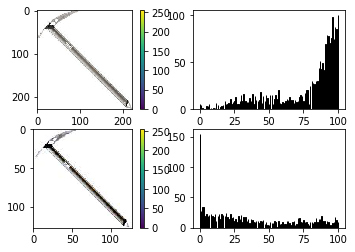

In [28]:
# Show Sample RGB Histogram Before and After

BeforeImage = "D:/MyWorx/Courses/PAF Bootcamp/Challenges/Images/gear_images/axes/100937.jpeg"  
AfterImage = "D:/MyWorx/Courses/PAF Bootcamp/Challenges/Images/output/axes/100937.jpeg"

imageBefore = mpimg.imread(BeforeImage)
imageAfter = mpimg.imread(AfterImage)
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.imshow(imageBefore)
plt.colorbar()
fig.add_subplot(2,2,2)
plt.hist(imageBefore.ravel(), bins=256, range=(0.0, 100), fc='k', ec='k')
fig.add_subplot(2,2,3)
plt.imshow(imageAfter)
plt.colorbar()
fig.add_subplot(2,2,4)
plt.hist(imageAfter.ravel(), bins=256, range=(0.0, 100), fc='k', ec='k')


In [65]:
output_array = []
for cls in classes:
    imageslist = [f for f in os.listdir(outputdir+'/'+cls) if os.path.isfile(os.path.join(cls,f))]
    for imagen in imageslist:
        im_array = np.array(Image.open(outputdir+'/'+cls+'/'+imagen))
        output_array.append([im_array,cls])
        
output_array = np.asarray(output_array)

print(output_array.shape)

np.save(outputdir+'/'+'images',output_array)

(2112, 2)


['axes' 'axes' 'axes' ... 'tents' 'tents' 'tents']
